In [8]:
#6.1.4
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#6.1.5
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=baff5a87b13d75787c97e4f30f1f06c4


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 
#Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | san juan
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | neiafu
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | namibe
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping.

Processing Record 34 of Set 4 | esperance
Processing Record 35 of Set 4 | afmadu
City not found. Skipping...
Processing Record 36 of Set 4 | severnyy
Processing Record 37 of Set 4 | honiara
Processing Record 38 of Set 4 | lompoc
Processing Record 39 of Set 4 | malakal
Processing Record 40 of Set 4 | daru
Processing Record 41 of Set 4 | kununurra
Processing Record 42 of Set 4 | aksu
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | stoyba
City not found. Skipping...
Processing Record 45 of Set 4 | ntungamo
Processing Record 46 of Set 4 | birjand
Processing Record 47 of Set 4 | marovoay
Processing Record 48 of Set 4 | gao
Processing Record 49 of Set 4 | morehead
Processing Record 50 of Set 4 | sisimiut
Processing Record 1 of Set 5 | kyren
Processing Record 2 of Set 5 | san jeronimo
Processing Record 3 of Set 5 | chernyshevskiy
Processing Record 4 of Set 5 | tapes
Processing Record 5 of Set 5 | bose
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5

Processing Record 28 of Set 8 | sao joao da barra
Processing Record 29 of Set 8 | marsh harbour
Processing Record 30 of Set 8 | beira
Processing Record 31 of Set 8 | naryan-mar
Processing Record 32 of Set 8 | teguise
Processing Record 33 of Set 8 | bonavista
Processing Record 34 of Set 8 | tubruq
City not found. Skipping...
Processing Record 35 of Set 8 | dzilam gonzalez
Processing Record 36 of Set 8 | ken caryl
Processing Record 37 of Set 8 | kardla
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | barranca
Processing Record 40 of Set 8 | tazovskiy
Processing Record 41 of Set 8 | fuzhou
Processing Record 42 of Set 8 | arkhangelsk
Processing Record 43 of Set 8 | lucapa
Processing Record 44 of Set 8 | magadan
Processing Record 45 of Set 8 | sharjah
Processing Record 46 of Set 8 | ballina
Processing Record 47 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 48 of Set 8 | presque isle
Processing Record 49 of Set 8 | ayer itam
City not found. Skipp

Processing Record 13 of Set 12 | bogorodskoye
Processing Record 14 of Set 12 | pervomayskiy
Processing Record 15 of Set 12 | matara
Processing Record 16 of Set 12 | griffith
Processing Record 17 of Set 12 | yuancheng
Processing Record 18 of Set 12 | walvis bay
Processing Record 19 of Set 12 | hervey bay
Processing Record 20 of Set 12 | iqaluit
Processing Record 21 of Set 12 | jiddah
City not found. Skipping...
Processing Record 22 of Set 12 | fenoarivo
Processing Record 23 of Set 12 | mustasaari
Processing Record 24 of Set 12 | banda aceh
Processing Record 25 of Set 12 | abonnema
Processing Record 26 of Set 12 | santa isabel do rio negro
Processing Record 27 of Set 12 | wilmington
Processing Record 28 of Set 12 | tanete
Processing Record 29 of Set 12 | sinjar
Processing Record 30 of Set 12 | georgiyevka
Processing Record 31 of Set 12 | richards bay
Processing Record 32 of Set 12 | omboue
Processing Record 33 of Set 12 | davila
Processing Record 34 of Set 12 | uray
Processing Record 35 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,73.44,96,100,7.96,ZA,2022-02-02 22:51:29
1,San Juan,-31.5375,-68.5364,84.63,35,15,12.95,AR,2022-02-02 22:51:29
2,Cabo San Lucas,22.8909,-109.9124,75.51,69,27,3.00,MX,2022-02-02 22:51:30
3,Neiafu,-18.6500,-173.9833,84.88,74,40,4.61,TO,2022-02-02 22:51:30
4,Ushuaia,-54.8000,-68.3000,44.26,57,75,25.32,AR,2022-02-02 22:47:31
5,Hilo,19.7297,-155.0900,80.33,69,75,6.91,US,2022-02-02 22:51:31
6,Barrow,71.2906,-156.7887,-20.18,69,0,3.44,US,2022-02-02 22:47:43
7,Butaritari,3.0707,172.7902,81.66,79,28,17.27,KI,2022-02-02 22:47:39
8,Tuktoyaktuk,69.4541,-133.0374,-22.00,76,75,13.80,CA,2022-02-02 22:49:14
9,Bluff,-46.6000,168.3333,58.80,64,100,17.20,NZ,2022-02-02 22:51:31


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-02-02 22:51:29,-33.5906,26.8910,73.44,96,100,7.96
1,San Juan,AR,2022-02-02 22:51:29,-31.5375,-68.5364,84.63,35,15,12.95
2,Cabo San Lucas,MX,2022-02-02 22:51:30,22.8909,-109.9124,75.51,69,27,3.00
3,Neiafu,TO,2022-02-02 22:51:30,-18.6500,-173.9833,84.88,74,40,4.61
4,Ushuaia,AR,2022-02-02 22:47:31,-54.8000,-68.3000,44.26,57,75,25.32


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
#6.3.1 
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

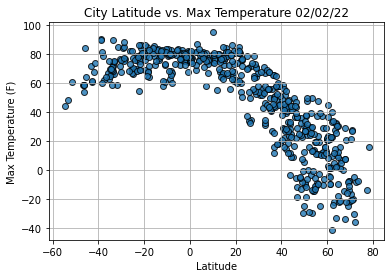

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

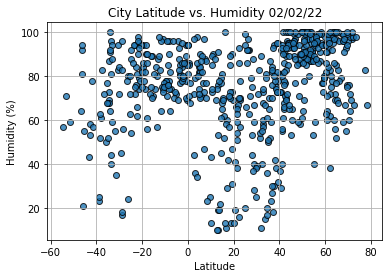

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

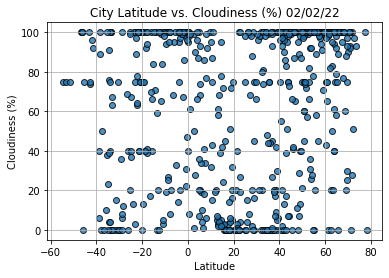

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

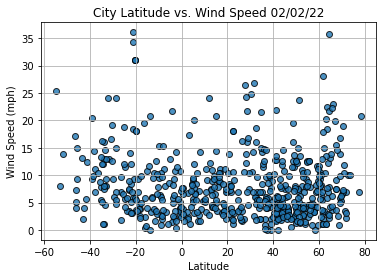

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()